# Jupter, Pyplot and Numpy Problem Sheet
This is a jupyter notebook of 10 exercises based on pyplot and numpy I need to complete for the Emerging Technologies module I am taking in my course this semester

# Exercise 1 - Get & load data

In [1]:
import numpy as np

filename = 'Iris.csv'
seLength, seWidth, ptLength, ptWidth = np.genfromtxt('Iris.csv', delimiter=',', usecols=(0,1,2,3), unpack=True, dtype=float)
species = np.genfromtxt('Iris.csv', delimiter=',', usecols=(4), unpack=True, dtype=str)

        
for i in range(10):
    print('{0:.1f} {1:.1f} {2:.1f} {3:.1f} {4:s}'.format(seLength[i], seWidth[i], ptLength[i], ptWidth[i], species[i]))

5.1 3.5 1.4 0.2 Iris-setosa
4.9 3.0 1.4 0.2 Iris-setosa
4.7 3.2 1.3 0.2 Iris-setosa
4.6 3.1 1.5 0.2 Iris-setosa
5.0 3.6 1.4 0.2 Iris-setosa
5.4 3.9 1.7 0.4 Iris-setosa
4.6 3.4 1.4 0.3 Iris-setosa
5.0 3.4 1.5 0.2 Iris-setosa
4.4 2.9 1.4 0.2 Iris-setosa
4.9 3.1 1.5 0.1 Iris-setosa


# Exercise 2 - Write a note about the data set

The Iris data set was founded by Ronald Fisher, a British man who was a statistican and biologist. It was introduced in a paper he wrote in 1936 called "The use of multiple measurements in taxonomic problems". The data set is made up of 50 samples from the 3 spicies of Iris and there is four features for each sample. The data set is used to aid in machine learning in areas such as support vector machines.

# Exercise 3 - Create a simple plot

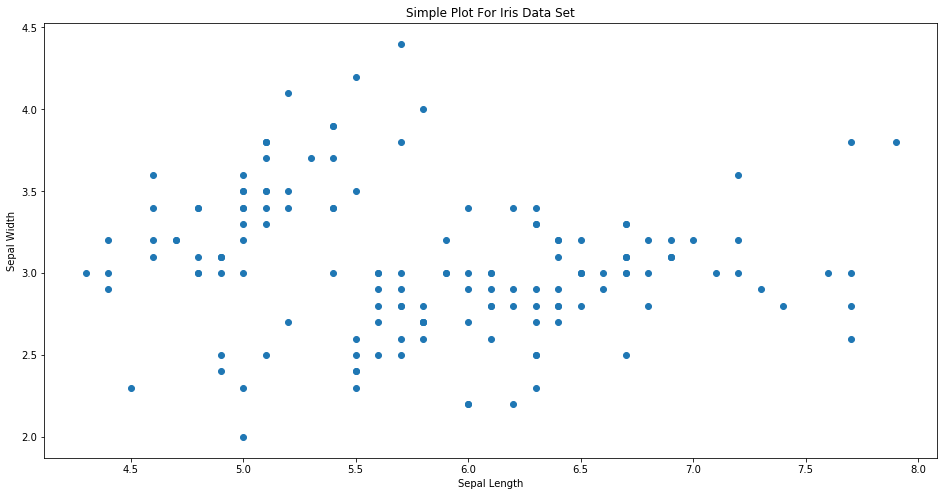

In [2]:
import matplotlib.pyplot as pl

x, y = seLength, seWidth

pl.rcParams['figure.figsize'] = (16,8)
pl.title('Simple Plot For Iris Data Set')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')
pl.scatter(x,y)
pl.show()

# Exercise 4 - Create a more complex plot

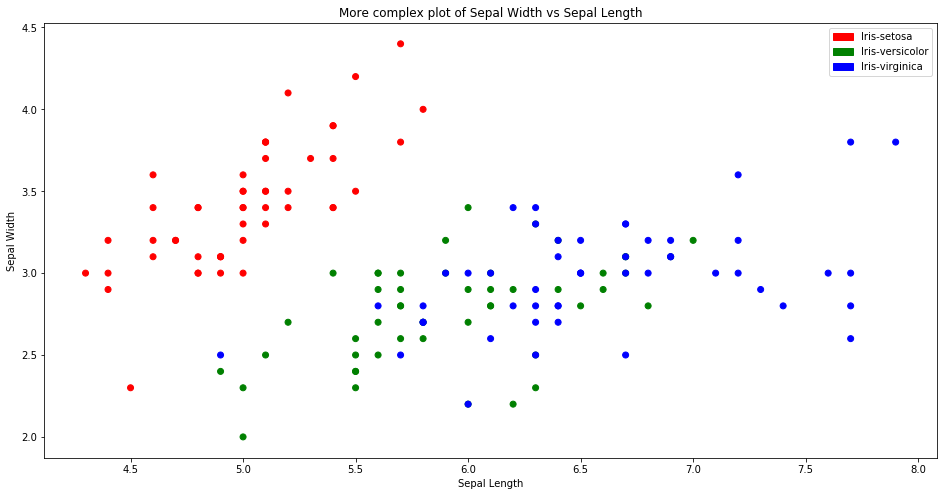

In [3]:
import matplotlib.patches as mpatches

# Setting the graph size
pl.rcParams['figure.figsize'] = (16,8)

# Assigning the different species to a specific colour
# https://stackoverflow.com/questions/27318906/python-scatter-plot-with-colors-corresponding-to-strings
colours = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

pl.scatter(seLength, seWidth, c=[colours[i] for i in species], label=[colours[i] for i in colours])
pl.title('More complex plot of Sepal Width vs Sepal Length')
pl.xlabel('Sepal Length')
pl.ylabel('Sepal Width')

handles = [mpatches.Patch(color=colour, label=label) for label, colour in colours.items()]

pl.legend(handles=handles, frameon=True)
pl.show()

# Exercise 5 - Use seaborn

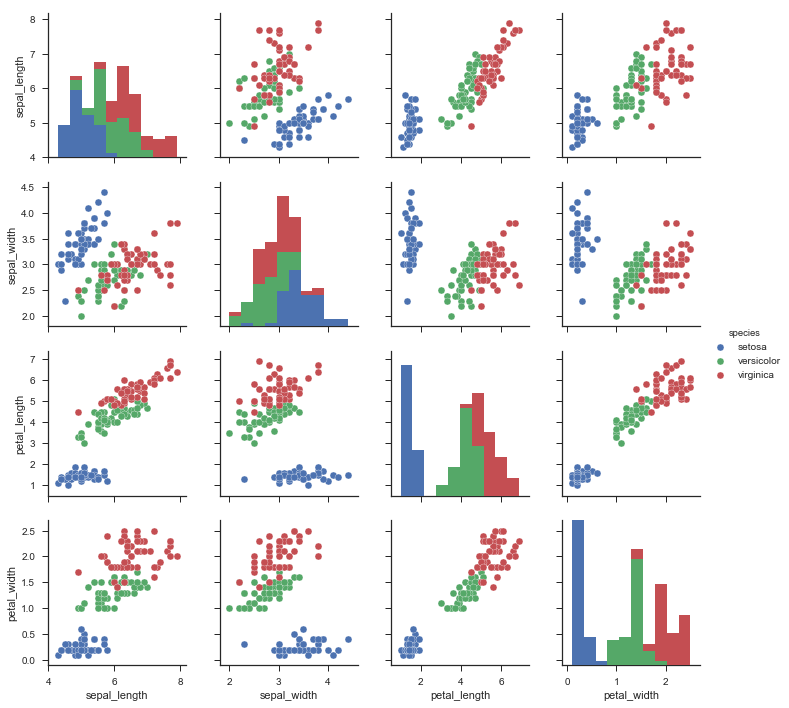

In [4]:
# Adapted from
# https://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up

import seaborn as sea
sea.set(style="ticks")

sea.plt.rcParams['figure.figsize'] = (16,8)
df = sea.load_dataset("iris")
sea.pairplot(df, hue="species")
sea.plt.show()

# Exercise 6 - Fit a line

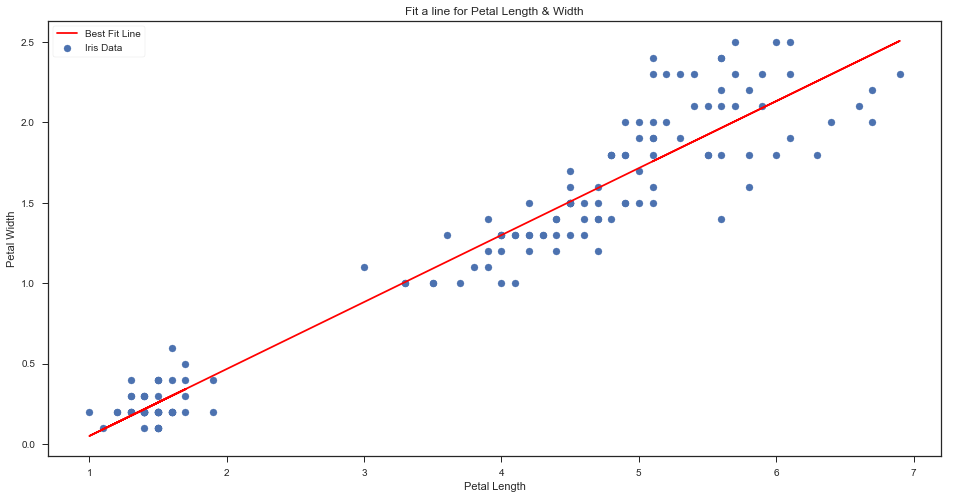

In [5]:
w, d = np.array(ptLength), np.array(ptWidth)

pl.rcParams['figure.figsize'] = (16,8)

w_avg = np.mean(w)
d_avg = np.mean(d)

w_zero = w - w_avg
d_zero = d - d_avg

m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
c = d_avg - m * w_avg

pl.rcParams['figure.figsize'] = (16,8)
pl.title('Fit a line for Petal Length & Width')
pl.xlabel('Petal Length')
pl.ylabel('Petal Width')

pl.scatter(w, d, label='Iris Data')
pl.plot(w, m * w + c, 'r', label='Best Fit Line')

pl.legend(frameon=True)
pl.show()

# Exercise 7 - Calculate the R-squared value

In [6]:
rsq = 1.0 - (np.sum((d - m * w - c)**2)/np.sum((d - d_avg)**2))
print("The R-squared value is %6.4f" % rsq)

The R-squared value is 0.9269


# Exercise 8 - Fit another line

In [7]:
sp = np.array(species)

'''
I tried for ages to get this going and I can't seem to get my head around it properly.

for i, item in enumerate(sp):
    if "Iris-setosa" in item:
        pLe = np.array[ptLength]
        pWi = np.array[ptWidth]
        pl.rcParams['figure.figsize'] = (16,8)
        pl.title('Line for Petal Length & Width of Setosa Iris')

        i = np.linspace(0,8,1000)
        pl.scatter(pLe, pWi)
        v = np.polyfit(pLe,pWi,1)
        line = v[0]*i+v[1]
        pl.plot(i,line)

        pl.legend()
        pl.show()'''


'\nI tried for ages to get this going and I can\'t seem to get my head around it properly.\n\nfor i, item in enumerate(sp):\n    if "Iris-setosa" in item:\n        pLe = np.array[ptLength]\n        pWi = np.array[ptWidth]\n        pl.rcParams[\'figure.figsize\'] = (16,8)\n        pl.title(\'Line for Petal Length & Width of Setosa Iris\')\n\n        i = np.linspace(0,8,1000)\n        pl.scatter(pLe, pWi)\n        v = np.polyfit(pLe,pWi,1)\n        line = v[0]*i+v[1]\n        pl.plot(i,line)\n\n        pl.legend()\n        pl.show()'

# Exercise 9 - Calculate the R-squared value

# Exercise 10 -  Use gradient descent

In [8]:
w, d = np.array(seLength), np.array(seWidth)
# Using lecturer notes as guide http://localhost:8889/notebooks/Lectures/gradient-descent.ipynb

def grad_m(x, y, m, c):
    return -2.0 * np.sum(x *(y - m * x - c))

def grad_c(x, y, m, c):
    return -2.0 * np.sum(y - m * x - c)

eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
    mnew = m - eta * grad_m(w, d, m, c)
    cnew = c - eta * grad_c(w, d, m, c)
    
    if m == mnew and c == cnew:
        change = False
    else:
        m, c = mnew, cnew
    
print('Gradient Descent m:%20.16f c:%20.16f' % (m, c))

Gradient Descent m: -0.0572682337971014 c:  3.3886373794877218
